In [1]:
import numpy as np  #linear algebra
import pandas as pd # a data processing and CSV I/O library
# from pandas_profiling import ProfileReport
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white', color_codes=True)

In [2]:
dia = pd.read_csv('diabetes_data.csv')

In [3]:
dia.info()
dia.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [4]:
dia.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

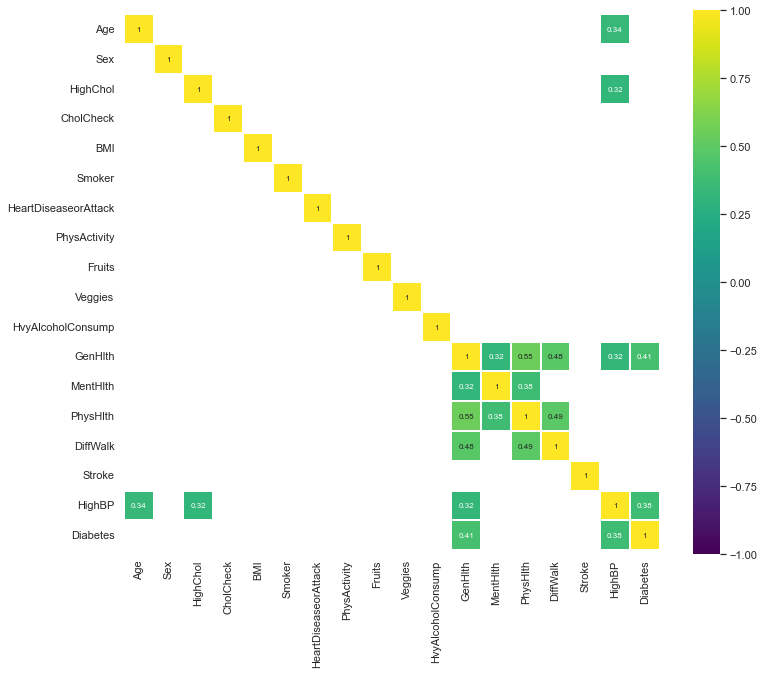

In [5]:
corr = dia.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

<AxesSubplot:>

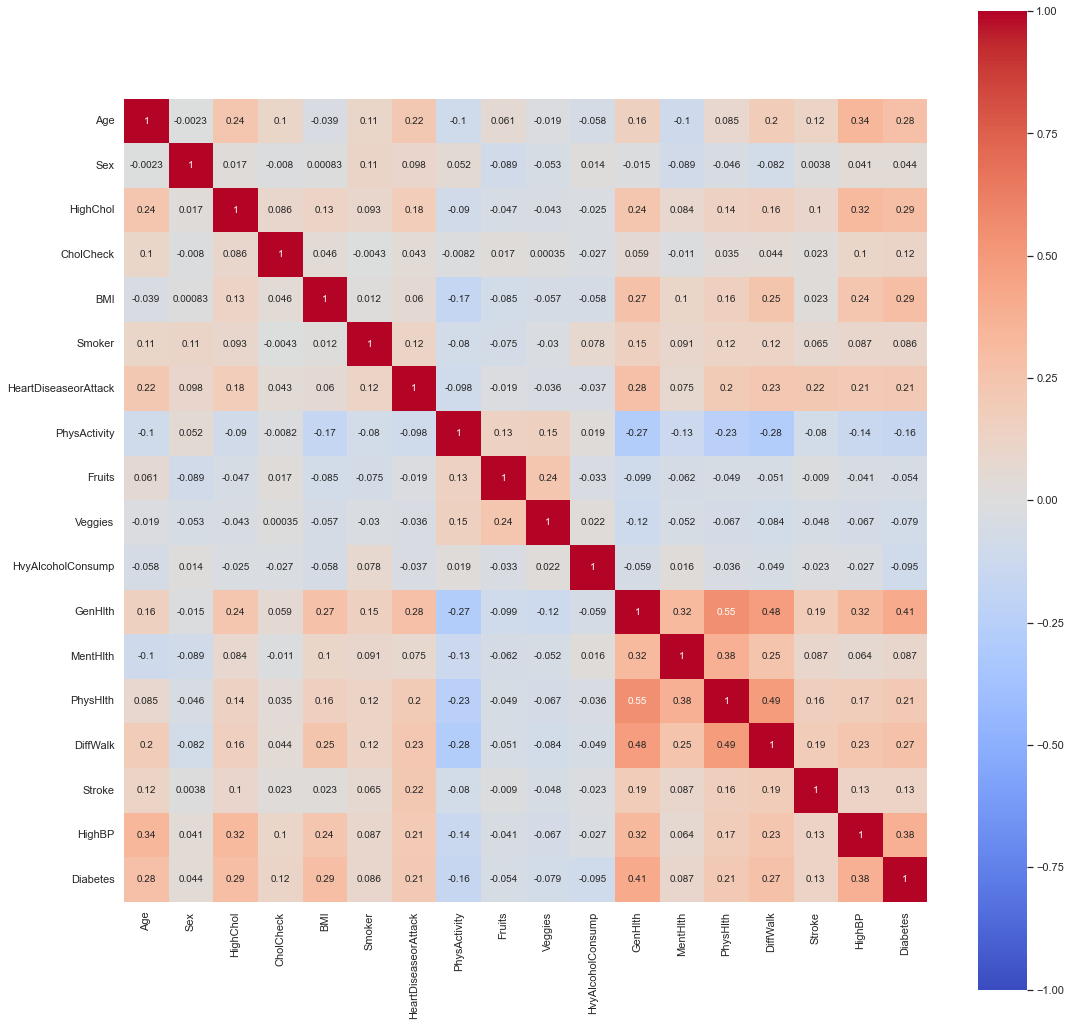

In [6]:
plt.figure(figsize=(18,18))
sns.heatmap(dia.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

<AxesSubplot:ylabel='Frequency'>

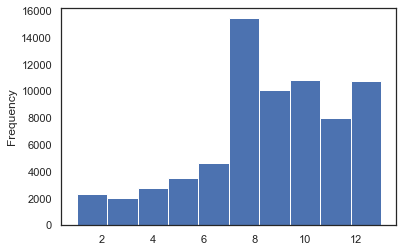

In [7]:
dia['Age'].plot(kind='hist')

In [8]:
dia = dia[np.isfinite(dia).all(1)]

In [9]:
X1 = dia.drop('Diabetes',axis=1)
y2 = dia[['Diabetes']]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

X_train , X_test , y_train , y_test = train_test_split(X1 , y2 , test_size=0.2,random_state=42)

In [11]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Multinomial Naive Bayes": MultinomialNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7478
- F1 score: 0.747741
- Precision: 0.748243
- Recall: 0.747847
----------------------------------
Model performance for Test set
- Accuracy: 0.7465
- Fl score: 0.7464
- Precision: 0.7471
- Recall: 0.7465


Decision Tree
Model performance for Training set
- Accuracy: 0.9718
- F1 score: 0.971769
- Precision: 0.972464
- Recall: 0.971779
----------------------------------
Model performance for Test set
- Accuracy: 0.6587
- Fl score: 0.6585
- Precision: 0.6589
- Recall: 0.6587


Random Forest
Model performance for Training set
- Accuracy: 0.9718
- F1 score: 0.971761
- Precision: 0.971785
- Recall: 0.971761
----------------------------------
Model performance for Test set
- Accuracy: 0.7250
- Fl score: 0.7246
- Precision: 0.7266
- Recall: 0.7250


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.8288
- F1 score: 0.828766
- Precision: 0.829025
- Recall: 0.828798
----------------------------------
Mod

In [12]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Multinomial Naive Bayes": MultinomialNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    #y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

    print(list(models.keys())[i])
    print(classification_report(y_test, y_test_pred))



Logisitic Regression
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7090
         1.0       0.73      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Decision Tree
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.66      7090
         1.0       0.66      0.64      0.65      7049

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139

Random Forest
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      7090
         1.0       0.71      0.76      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73  

In [13]:
xgb_clr = XGBClassifier()
xgb_clr.fit(X_train, y_train)
y_pred_xgb = xgb_clr.predict(X_test)
# accuracy_score(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



[0.03268139 0.01721998 0.06315095 0.05125859 0.02525491 0.00985928
 0.02702174 0.01032355 0.01005577 0.01123069 0.03844737 0.13781081
 0.00910979 0.00963773 0.02379485 0.01429619 0.50884634]


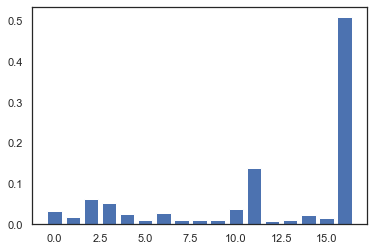

In [14]:
print(xgb_clr.feature_importances_)
plt.bar(range(len(xgb_clr.feature_importances_)), xgb_clr.feature_importances_)
plt.show()